In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


df = pd.read_csv("PRDTF_202402130432347020.csv", encoding='cp949')
df.head()

,trdar_no,trdar_nm,signgu_cd,signgu_nm,link_cnt,minm_txtr,max_txtr,ave_txtr
0,10000,지행역,41250,동두천시,60,54.9,1941.8,466.0
1,10001,전곡터미널,41800,연천군,98,0.2,223.0,43.8
2,10002,가능역,41150,의정부시,65,16.0,1039.0,343.3
3,10003,경기도청북부청사역_1,41150,의정부시,105,1.9,518.4,89.4
4,10004,경기도청북부청사역_2,41150,의정부시,103,11.5,1015.4,139.8


In [59]:
df.drop(columns=['trdar_no', 'signgu_cd', 'signgu_nm', 'trdar_nm'], inplace=True)
df.corr()



,link_cnt,minm_txtr,max_txtr,ave_txtr
link_cnt,1.000000,-0.205460,0.042837,-0.19541
minm_txtr,-0.205460,1.000000,0.377911,0.70476
max_txtr,0.042837,0.377911,1.000000,0.82584
ave_txtr,-0.195410,0.704760,0.825840,1.00000


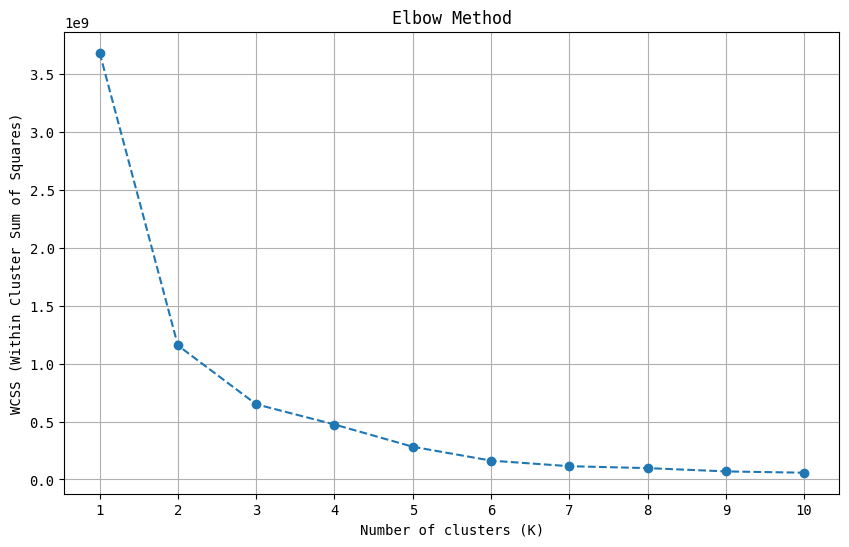

In [126]:
from sklearn.cluster import KMeans

# 최대 클러스터 수 설정
max_clusters = 10
wcss = []

# K 값을 1부터 최대 클러스터 수까지 변경하면서 WCSS 값을 계산
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df[['link_cnt', 'max_txtr']])
    wcss.append(kmeans.inertia_)

# WCSS 값을 그래프로 나타내기
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()

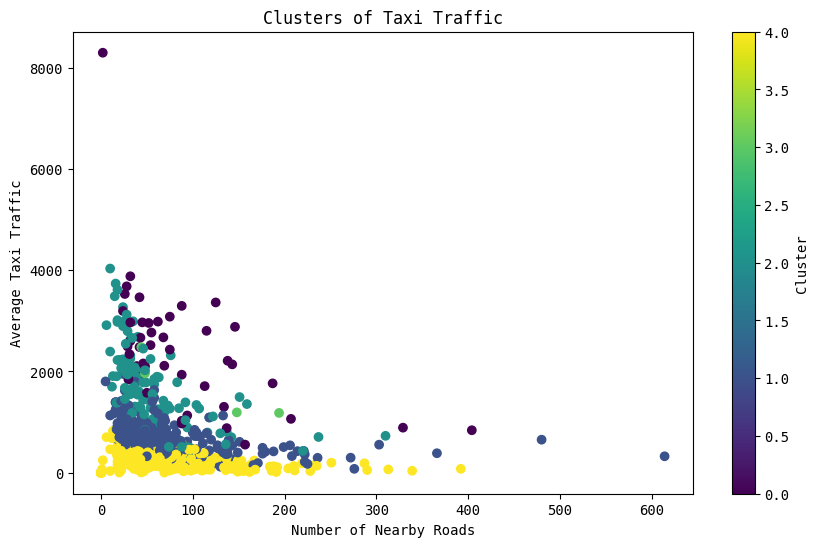

In [125]:
# 결정된 K 값으로 K-means 알고리즘을 초기화하고 클러스터링을 수행
k = 5  # 예시로 K 값을 3으로 설정
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(df[['link_cnt','max_txtr']])
labels = kmeans.labels_

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(df['link_cnt'], df['ave_txtr'], c=labels, cmap='viridis')
plt.title('Clusters of Taxi Traffic')
plt.xlabel('Number of Nearby Roads')
plt.ylabel('Average Taxi Traffic')
plt.colorbar(label='Cluster')
plt.show()

In [123]:
from sklearn.metrics import silhouette_score

# 실루엣 점수 계산
silhouette_avg = silhouette_score(df[['link_cnt', 'max_txtr']], labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5707897197903758
